# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin, Ethereum, Helium, and Maker Daily Price Analyses – 27 July Roundup.  The performance of the global crypto market has witnessed a speedy change in recent hours. A bullish influx has been seen in the market, which strengthened Bitcoin, Ethereum, and others. The speedy gains for these coins have helped make up for the losses of the last few days in a single go. As the bullish &#8230;  Bitcoin, Ethereum, Helium, and Maker Daily Price Analyses – 27 July Roundup Read More &#187; ... [| Skaityti daugiau](https://www.cryptopolitan.com/bitcoin-ethereum-helium-and-maker-daily-price-analyses-27-july-roundup/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Millions still without sense of smell or taste after Covid-19.  Still struggling with your sense of smell after a bout with Covid-19? You’re far from alone. ... [| Skaityti daugiau](https://www.nbcnews.com/science/science-news/millions-still-sense-smell-test-covid-19-rcna40235) 

### Kainų kaita pandemijos metu

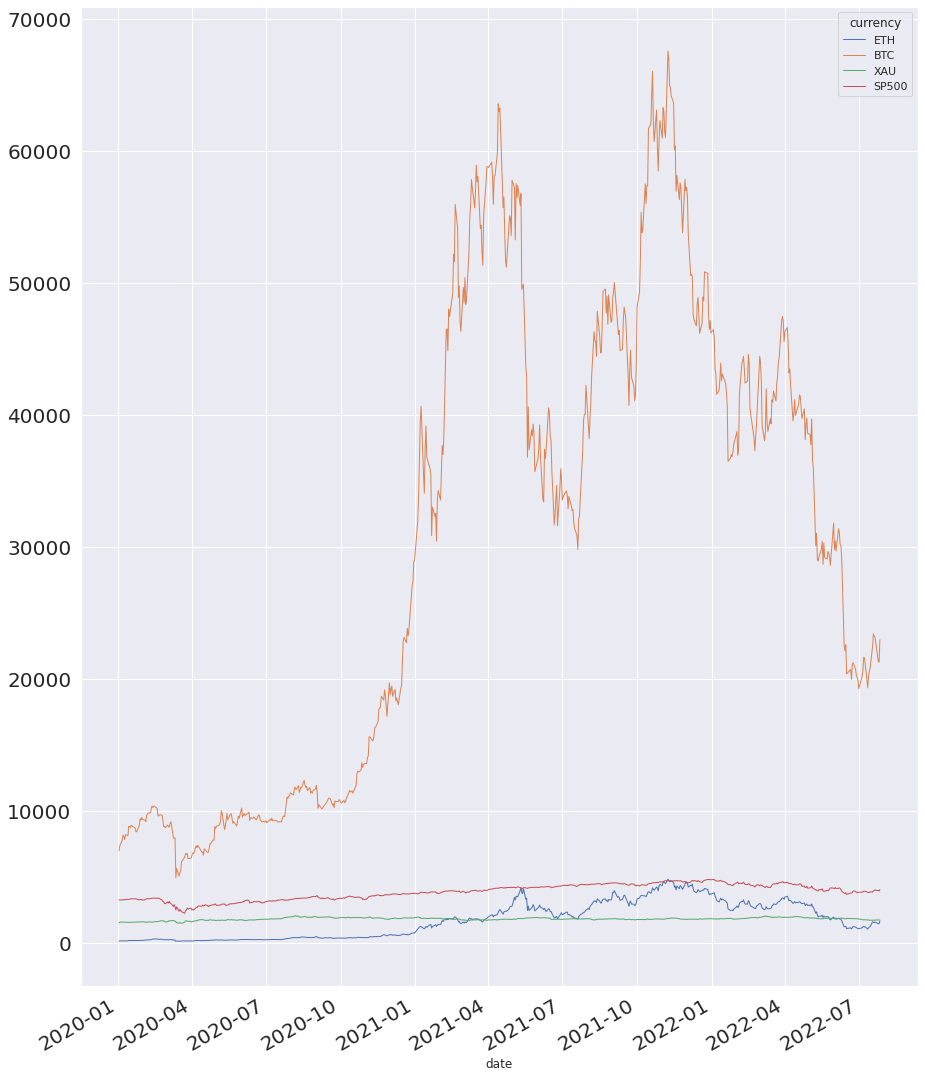

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903050,0.248821,0.920115
BTC,0.903050,1.000000,0.200531,0.864760
XAU,0.248821,0.200531,1.000000,0.373358
SP500,0.920115,0.864760,0.373358,1.000000


In [8]:
#hide ### Koreliacijos matrica.

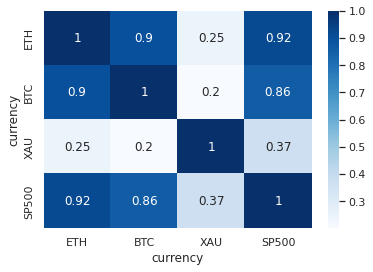

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')